In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

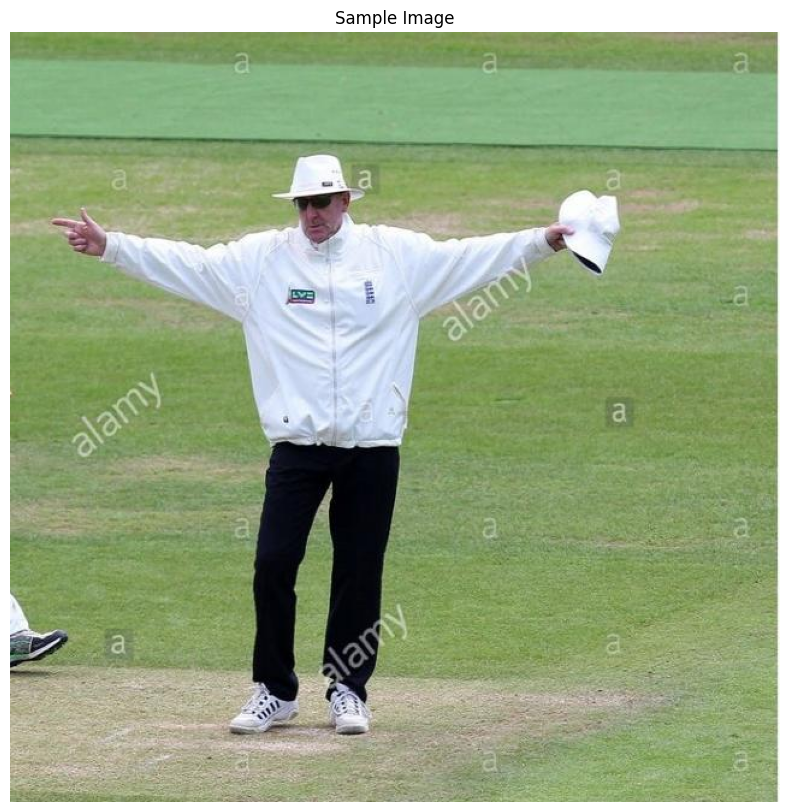

In [4]:
# Read an image from the specified path.
sample_img = cv2.imread(r'c:\Users\praga\OneDrive\Pictures\wide_38_jpg.rf.f4f084865fb297ff06a1fb2b2ea08dd4.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [5]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.408660829
y: 0.230215818
z: -0.425302744
visibility: 0.999893904

LEFT_EYE_INNER:
x: 0.41323933
y: 0.215669781
z: -0.398447186
visibility: 0.999584377



In [6]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 261.54293060302734
y: 147.3381233215332
z: -272.1937561035156
visibility: 0.9998939037322998

LEFT_EYE_INNER:
x: 264.47317123413086
y: 138.02865982055664
z: -255.00619888305664
visibility: 0.9995843768119812



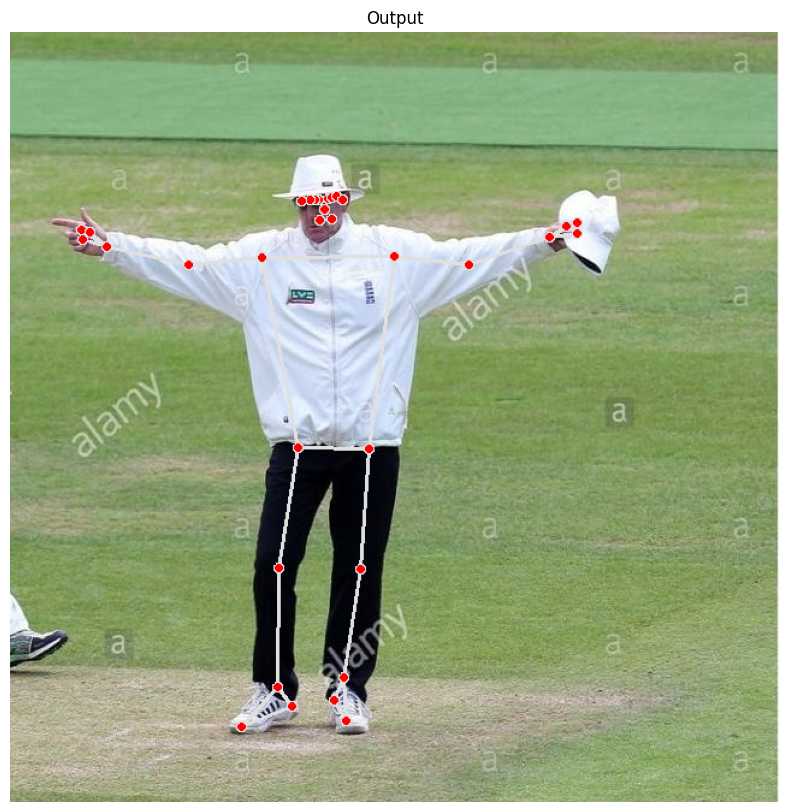

In [7]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

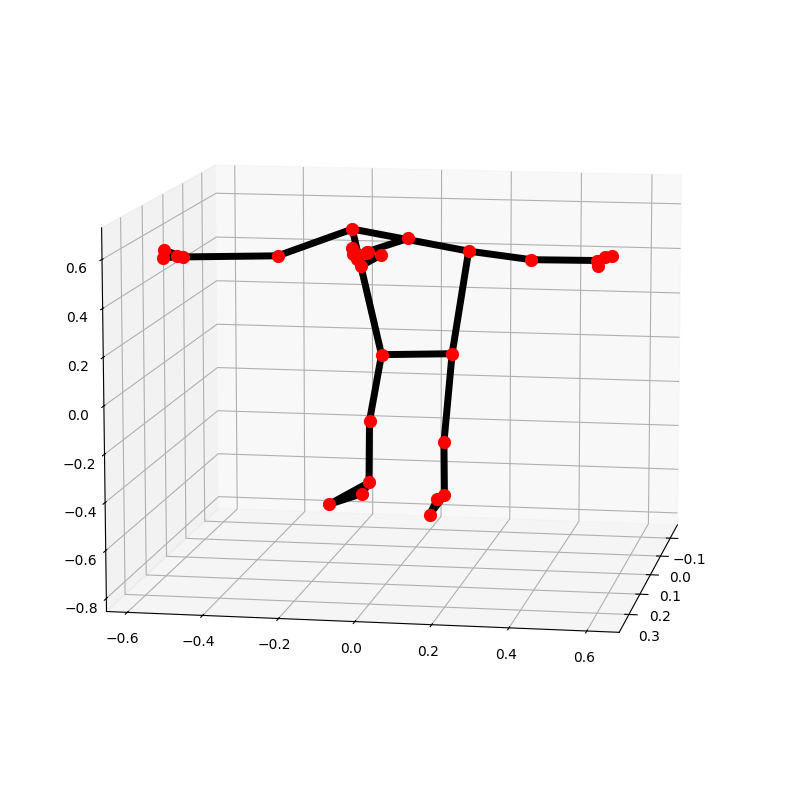

In [8]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [8]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

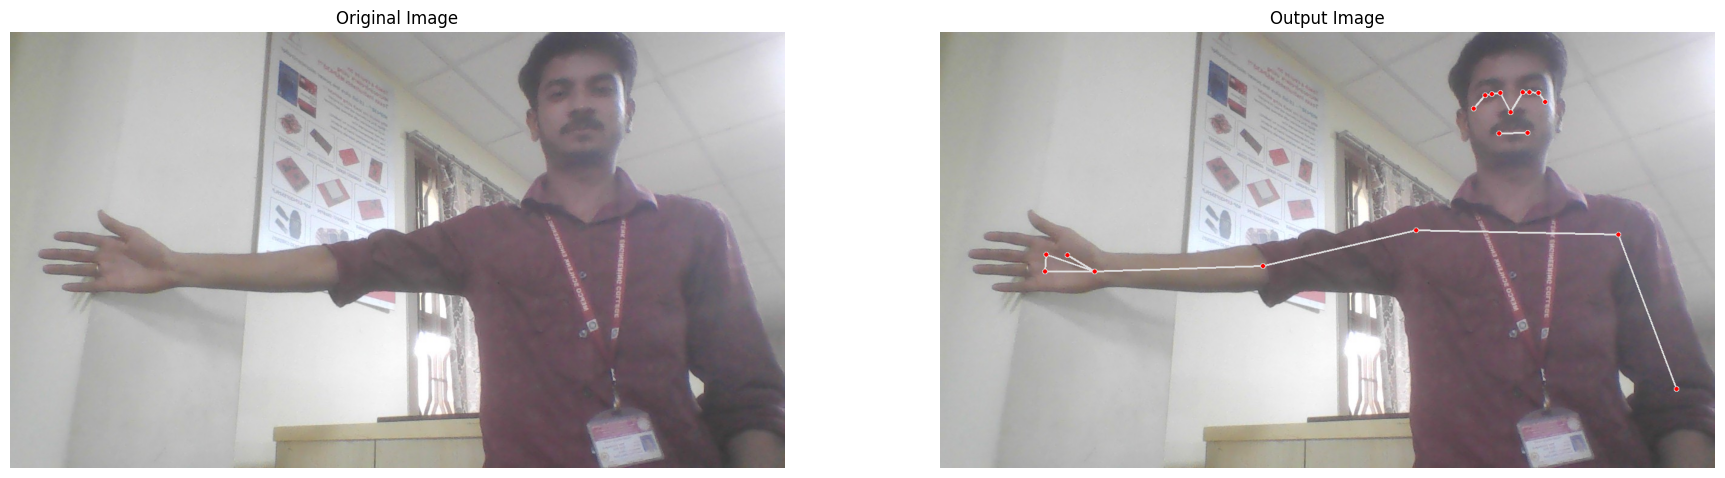

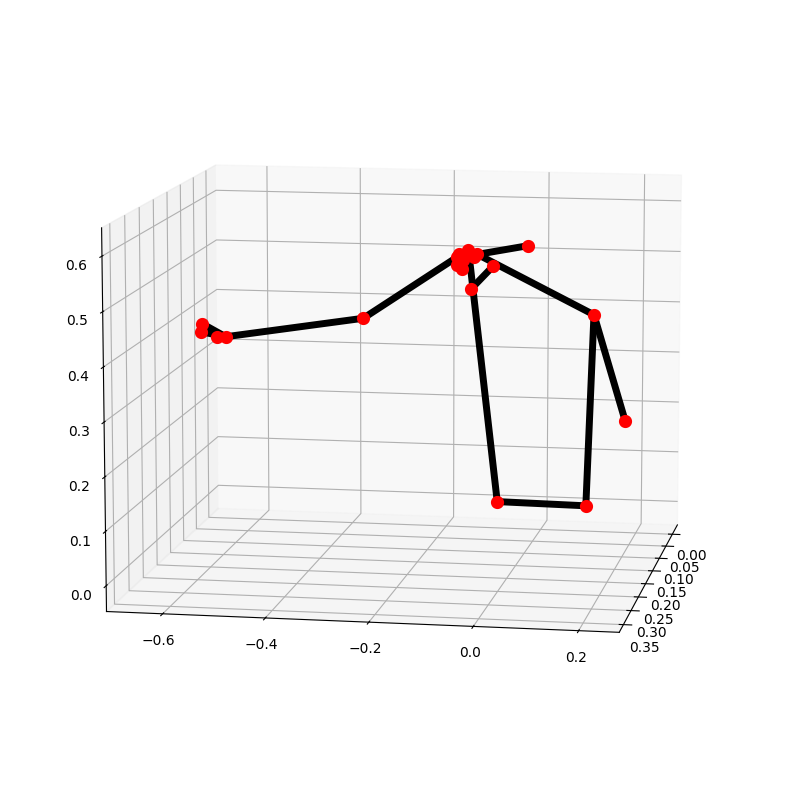

In [10]:
# Read another sample image and perform pose detection on it.
image = cv2.imread(r'c:\Users\praga\Downloads\tmpypr3wkwp.PNG')
detectPose(image, pose, display=True)

In [2]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
video = cv2.VideoCapture(0)

# Initialize the VideoCapture object to read from a video stored in the disk.
#video = cv2.VideoCapture('media/running.mp4')


# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the video is accessed successfully.
while video.isOpened():
    
    # Read a frame.
    ok, frame = video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Break the loop.
        break
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()
    
    # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
    if (time2 - time1) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Pose Detection', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object.
video.release()

# Close the windows.
cv2.destroyAllWindows()

NameError: name 'mp_pose' is not defined

In [3]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [4]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [5]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies cricket umpire signals based on specific gestures and joint angles.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: An image of the person with the detected pose landmarks drawn.
        display: A boolean value; if set to True, the function displays the resultant image with the signal label.
    Returns:
        output_image: The image with the detected pose landmarks drawn and signal label written.
        label: The classified signal label of the umpire in the output_image.
    '''

    # Initialize the label of the signal. It is not known at this stage.
    label = 'Unknown Signal'

    # Specify the default label color (Red).
    color = (0, 0, 255)
    
    # Calculate required angles for umpire signals.
    # --------------------------------------------------------------------------
    
    # Get the angle between left shoulder, elbow, and wrist for the left arm.
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between right shoulder, elbow, and wrist for the right arm.
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])

    # Get the angle between left hip, shoulder, and elbow for the left arm.
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value])

    # Get the angle between right hip, shoulder, and elbow for the right arm.
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    print('Angle:',left_elbow_angle,right_elbow_angle,left_shoulder_angle, right_shoulder_angle,left_knee_angle, right_knee_angle)
    
    # --------------------------------------------------------------------------
    if (left_elbow_angle > 90 and left_elbow_angle < 195 and 
         left_shoulder_angle > 0 and left_shoulder_angle < 30 and 
          right_shoulder_angle > 0 and right_shoulder_angle < 30 and 
          right_elbow_angle > 90 and right_elbow_angle < 195
          and left_knee_angle>150 and left_knee_angle<195 and right_knee_angle>150 and right_knee_angle<195):
        label = "No Signal"
        color = (255, 0, 0)
    # Define criteria for each umpire signal.
    elif (left_elbow_angle > 100 and left_elbow_angle < 195 and 
         left_shoulder_angle > 40 and left_shoulder_angle < 100 and 
          right_shoulder_angle > 40 and right_shoulder_angle < 100 and 
          right_elbow_angle > 100 and right_elbow_angle < 195):
        label = "Wide Signal"
        color = (0, 255, 0)
    # "Six" Signal: Both arms raised straight above the head.
    elif (left_elbow_angle > 100 and left_elbow_angle < 195 and 
        right_elbow_angle > 100 and right_elbow_angle < 195 and
        right_shoulder_angle > 130 and right_shoulder_angle < 195 and left_shoulder_angle > 130 and left_shoulder_angle <195):
        label = "Six Signal"
        color = (0, 255, 0)  # Green for recognized signals.
    
    # "No Ball" Signal: Right arm extended horizontally at shoulder level.
    elif (right_elbow_angle > 100 and right_elbow_angle < 195 and 
          left_elbow_angle > 100 and left_elbow_angle < 195 and 
          right_shoulder_angle > 0 and right_shoulder_angle < 30 and left_shoulder_angle < 90 and left_shoulder_angle>0):
        label = "No Ball Signal"
        color = (0, 255, 0)
        #"No Ball" Signal: left arm extended horizontally at shoulder level
    #elif (left_elbow_angle > 80 and left_elbow_angle < 195 and 
     #     right_elbow_angle > 80 and right_elbow_angle < 195 and 
      #    left_shoulder_angle > 10 and left_shoulder_angle < 100 and right_shoulder_angle < 40):
       # label = "No Ball Signal"
        #color = (0, 255, 0)
    
    # "revoke" Signal: both arm is  extended across at shoulder level.
    elif (right_elbow_angle > 40 and right_elbow_angle < 60 and 
          left_elbow_angle > 40 and left_elbow_angle < 60 and 
          right_shoulder_angle > 0 and right_shoulder_angle < 10 and left_shoulder_angle > 0 and left_shoulder_angle<10 and 
          left_knee_angle>150 and left_knee_angle<195 and right_knee_angle>150 and right_knee_angle<195):
        label = "Revoke signal"
        color = (0, 255, 0)
   
    elif ( (left_knee_angle>0 and left_knee_angle<130) or(right_knee_angle>0 and right_knee_angle<130)):
        label = "leg_bye signal"
        color = (0, 255, 0)

    #elif left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
     #       label = 'T Pose'
    # --------------------------------------------------------------------------
    
    # Write the label on the output image.
    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
        # Display the resultant image.
        plt.figure(figsize=[10, 10])
        plt.imshow(output_image[:, :, ::-1])
        plt.title("Output Image")
        plt.axis('off')
    else:
        # Return the output image and the classified label.
        return output_image, label

In [7]:
# Read a sample image and perform pose classification on it.
image = cv2.imread(r'c:\Users\praga\OneDrive\Pictures\vlcsnap-2025-01-22-15h01m18s199.png')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

NameError: name 'detectPose' is not defined

In [26]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(r'c:\PROJECT\Final Year Project\Own dataset\six.mp4')
#camera_video = cv2.VideoCapture(0)
# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Check if the landmarks are detected.
    if landmarks:
        
        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()

Angle: 49.71052335712425 309.2454346688978 279.84735679635537 85.79816848175014 182.75336097123252 178.4902554171002
Angle: 58.0829906748111 301.2007594389058 274.16083889743646 93.66674258239705 182.75336097123252 178.4696935017751
Angle: 71.35592029252237 289.4256008243216 264.33691177785727 104.98330537281433 181.70930410693597 178.4297104102102
Angle: 84.0162574264391 279.2596465032759 255.0993779705947 111.1558204653804 181.71903504765643 178.85155537936268
Angle: 97.27421162927044 265.87861958243553 245.78683628351274 121.91666626590481 181.69690743051 179.4465755184265
Angle: 106.94326507131416 251.20792330348215 239.17129345037736 129.81277047574866 181.67513024436252 179.44547375240833
Angle: 116.5207902515346 240.13619612843326 233.58111058537776 136.09663529074467 181.22126898323918 179.4955965361649
Angle: 122.60590742311732 227.98564025611648 229.60452576422827 141.25950849384787 181.21294828992507 179.57653557830378
Angle: 135.4461466428349 219.38465029331687 223.16806102

KeyboardInterrupt: 

In [ ]:
def calculateAngle(a, b, c):
    ba = np.array([a[0] - b[0], a[1] - b[1]])
    bc = np.array([c[0] - b[0], c[1] - b[1]])
    cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    return np.degrees(angle)


In [ ]:
camera_video = cv2.VideoCapture(r'c:\PROJECT\Final Year Project\Own dataset\six.mp4')
#camera_video = cv2.VideoCapture(0)
# Initialize a variable to store the time of the previous frame.
time1 = 0

# Setup Pose function for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Loop to process the video frame by frame.
while camera_video.isOpened():
    # Read a frame from the video.
    ok, frame = camera_video.read()
    
    # Break the loop if the frame was not read successfully.
    if not ok:
        break
    
    # Flip the frame horizontally for a natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the frame height and width.
    frame_height, frame_width, _ = frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform pose detection on the current frame.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Classify the pose in the current frame.
    if landmarks:
        frame, label = classifyPose(landmarks, frame, display=False)
    
    # Calculate the Frames Per Second (FPS).
    time2 = time()
    if (time2 - time1) > 0:
        fps = 1.0 / (time2 - time1)
        cv2.putText(frame, f'FPS: {int(fps)}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    time1 = time2
    
    # Display the output frame with the pose classification label.
    cv2.imshow('Pose Classification', frame)
    
    # Break the loop if the 'ESC' key is pressed.
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the VideoCapture object and close the display window.
camera_video.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined